Social Networks SS21

# Home Assignment 3



### General Instructions

Submit your solution via Moodle until 23.59pm on Monday, June 28th.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the datasets you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1b), enter your answer in the specified markdown cell. Do NOT remove or edit the label (e.g. '__A1b):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Run your notebook from top to bottom, make sure there is no error!
  Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Esi',
        'last_name': 'Doda',
        'student_id': 416909
    },
    {
        'first_name': 'Bob',
        'last_name': 'Bar',
        'student_id': 54321
    },
    {
        'first_name': 'J',
        'last_name': 'Doe',
        'student_id': 90000
    }
]

In [2]:
# general immports may go here!
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List, Optional, Tuple, Dict

### The Hamsterster Network

In this home assignment we will conduct some analysis of the Hamsterster Network, next to a number of simulations. This network contains friendships and family links between users of the website hamsterster.com, which was an online social network of hamster owners and is now shut down. 
The network data has been taken from the KONECT repository, and consists of multiple data files. For simplicity, we will only consider the biggest connected component of the network.

__References:__  
[1] Jérôme Kunegis. KONECT - The Koblenz Network Collection. In Proc. Int. Web Observatory Workshop, pages 1343-1350, 2013  
[2] Hamsterster full network dataset -- KONECT, April 2017. [ http://konect.cc/networks/petster-hamster/ ]

### Task 1:  Analyzing the Hamsterster Network (22 pts)


#### a) Loading the Network (5 pts)
The information of the network is stored in multiple files, where one file contains the edges in the network, and one file contains node attributes. Next to the edges, some of the attributes are also of particular interest for us, namely 
the hamster's  
(1) gender,  
(2) species (divided into Hamster and Gerbil),  
(3) home country (divided into either USA or others).

Read in the Hamsterster Network from the datasets that we have provided. In particular, join the information regarding the edges with the desired information regarding the three node attributes in a graph ``G``. Save the three node attributes in ``G`` using attribute names ``'gender'``, ``'species'`` and ``'home'``. Only use attribute values ``'male'`` and ``'female'`` for the gender, ``'hamster'`` and ``'gerbil'`` for the species and ``'usa'`` and ``'other'`` for the home country (do not use upper case letters in the attribute names and values). 

After reading in the full network data, delete all nodes from ``G`` which do not belong to its biggest connected component. Do NOT reindex the nodes though! In the end, save the (new) numbers of nodes and edges of ``G`` in ``n_nodes`` and ``n_edges``. Save the attribute values of node 1 in a dictionary ``sample_attr`` with format ``{'gender': 'VALUE1', 'species': 'VALUE2', 'home': 'VALUE3'}`` .

_Hint: Note that for the species and home country, you can **not** directly take the values from the data file, you have to preprocess them first. Additionally, make sure to transform upper to lower case letters (also for gender)._

**Important: Make sure that you do not modify ``G`` anymore in the following tasks (especially in task 3), i.e. create copies before modifying the graph.**

In [3]:
# at the end of subtask 1a), G should only contain the biggest connected component

# reading the edgelist and attributes data
import pandas
G = nx.read_edgelist("hamsterster.edgelist", comments='%', delimiter=' ', nodetype=int)
df = pandas.read_csv("hamsterster.csv", sep=' ', encoding='unicode escape', index_col=0)

gender_dict={}
species_dict={}
home_dict={}

# preprocess data
df['dat.gender'] = df['dat.gender'].replace(["Female","Male"],["female","male"])
df['dat.species'] = df['dat.species'].replace(["Hamster.*", "Gerbil.*"], ["hamster", "gerbil"], regex=True)
df['dat.homecountry'] = df['dat.hometown'].str.contains("United States").replace([True, False], ["usa", "other"])

gender_dict = df['dat.gender'].to_dict()
species_dict = df['dat.species'].to_dict()
home_dict = df['dat.homecountry'].to_dict()

#set node attributes
nx.set_node_attributes(G, gender_dict, "gender")
nx.set_node_attributes(G, species_dict,"species")
nx.set_node_attributes(G, home_dict,"home")

#get biggest component
G = G.subgraph(max(nx.connected_components(G), key=len)).copy()
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

#find attributes' first node
sample_attr = {}
for attribute, value in G.nodes[1].items():
    sample_attr[attribute] = value
    
print(n_nodes)
print(n_edges)
print(sample_attr)

1786
12473
{'gender': 'male', 'species': 'hamster', 'home': 'usa'}


#### b) Basic Network Analysis (3 pts)

Conduct a basic network analysis of ``G``, i.e. compute the network's density, the average path length, the diameter and its average clustering coefficient. Store the results in ``density``, ``avg_pl``, ``diameter`` and ``avg_cc``. Plot the degree distribution and save it as **'dd.png'**. Do not remove the lines of your code which create and save your .png file.

Does the network display the properties that you would typically expect from a social network?

Density: 0.007824944087377392; Average Shortest Path: 3.4525845276520464; Diameter: 14; Average clustering coefficient: 0.1429132061246609;


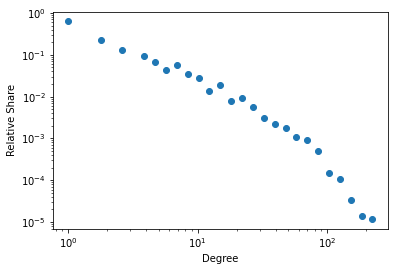

In [4]:
density = nx.density(G)
avg_pl = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
avg_cc = nx.average_clustering(G)

print("Density: {}; Average Shortest Path: {}; Diameter: {}; Average clustering coefficient: {};"
      .format(density, avg_pl, diameter, avg_cc))

from matplotlib import pyplot as plt

degrees = list(dict(G.degree).values())

bin_edges = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=30)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
plt.loglog(bin_edges[:-1], density, marker='o', linestyle='none')

plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.savefig('dd.png')
plt.show()

**A1b):** _Please provide your answer regarding your observations here!_

Like real networks, the hamster network satisifes the small-world property because the average shortest path length is much shorter than the diameter (largest shortest path), the plot clearly indicate a power-law degree distribution and it is a sparse network. But, unlike real networks, the network is not highly clustered.

#### c) Analyzing Assortativity (3 pts)

Compute the network's degree assortativity coefficient and store it in a variable ``dac``. Plot the average degree correlation $k_{nn}(k)$ against $k$ and save the plot as **'adc.png'**! Do not remove the lines of your code which create and save your .png file.

Would you say that this network is assortative, disassortative, or rather neutral? Does the result coincide with what is typically observed in social networks?

-0.0888108719539831


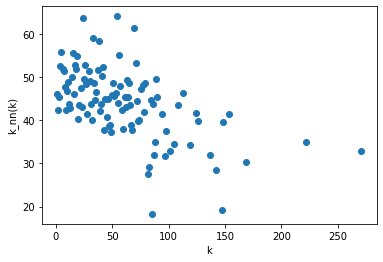

In [5]:
# Network's degree assortativity coefficient 
dac = nx.degree_assortativity_coefficient(G)
print(dac)

# Average degree correlation
knn = nx.average_degree_connectivity(G)

plt.scatter(knn.keys(), knn.values())
plt.xlabel("k")
plt.ylabel("k_nn(k)")
plt.savefig('adc.png')
plt.show()

**A1c):** The network is disassortative, with the assortativity coefficient being smaller than zero, and also decreasing values of 𝑘𝑛𝑛(𝑘) with increasing 𝑘. This does not coincide with real social networks, which usually are assortative.

#### d) Analyzing Homophily (3 pts)

We want to compute the network's homophily with respect to the hamster's  
(1) gender,  
(2) species (divided into Hamster and Gerbil),  
(3) home country (divided into either USA or others),  
i.e., the attributes that have been read in a).


For each of these three attributes:   
(i) measure the homophily of the partition according to the attribute by computing the modularity of the partition,  
(ii) argue whether the network is homophilic or heterophilic with respect to that attribute.

Store the modularity values in ``m_gender``, ``m_species`` and ``m_home``.

In [7]:
from networkx.algorithms import community

def partition_by_attribute(G, attr):
    nodes = nx.get_node_attributes(G, attr)
    partition = {}
    for key, value in nodes.items():
        if value in partition.keys():
            partition[value].append(key)
        else:
            partition[value] = [key]
    return partition.values()

partition_gender = partition_by_attribute(G, 'gender')
m_gender = community.modularity(G, partition_gender)
print(m_gender)

partition_species = partition_by_attribute(G, 'species')
m_species = community.modularity(G, partition_species)
print(m_species)

partition_home = partition_by_attribute(G, 'home')
m_home = community.modularity(G, partition_home)
print(m_home)

0.004850252059561272
0.013721227685842946
0.06453063125289937


**A1d):** The modularities of all attributes have all positive small values, therefore the network is slightly homophilic with respect to all the attributes.

#### e) Minorities in the Hamsterster Network (8 pts)

Finally, we want to analyze how minorities and homophily interplay on this network with respect to the three attributes gender, species and home country.

To evaluate the effects of homophily on minorities with respect to these three attributes  
(i) compute the shares of the hamsters belonging to each category of each of the three given attributes,    
(ii) plot the degree distributions of both classes per attribute against each other,  
(iii) compute the average node-wise perception biases regarding the size of the minority group for both majority and minority with respect to each of the three attributes.

Store the shares of hamsters into dictionaries ``dist_gender``, ``dist_species`` and ``dist_home`` with format given below. Save the degree distributions as **'dd_gender.png'**, **'dd_species.png'** and **'dd_home.png'**. Do not remove the lines of your code which create and save your .png file. Store the perception biases in ``pb_gender``, ``pb_species`` and ``pb_home`` with format given below.

Interpret these results in light of the findings presented in the lecture and the last home assignment (HA2 2c and 2e)!


In [8]:
# you may use this function to compute the node-wise perception biases
def perception_bias(G: nx.Graph, attr: str) -> Dict[str, float]:
    """
    :param G: networkx graph on which we want to compute all biases
    :param attr: string specifying the name of the node attribute which stores the information
    :            whether a node belongs to the majority or minority group. The value of that attribute should be 0 
    :            if the node belongs to the minority, and 1 otherwise
    :
    :return: dictionary with node IDs as keys and their respective individual perception bias as value
    """
    f_m = 1 - sum(G.nodes[v][attr] for v in G.nodes)/G.number_of_nodes()
    bias_dict = dict()
    for v in G.nodes:
        bias_dict[v] = 1/f_m/G.degree(v)*sum(1-G.nodes[w][attr] for w in G[v])
    return bias_dict

{'female': 0.5218365061590146, 'male': 0.47816349384098544}
{'hamster': 0.9512877939529675, 'gerbil': 0.048712206047032476}
{'usa': 0.6713325867861142, 'other': 0.32866741321388576}


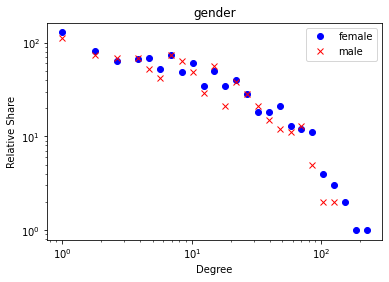

{'majority': 0.9431633226093521, 'minority': 0.9362951757838581}


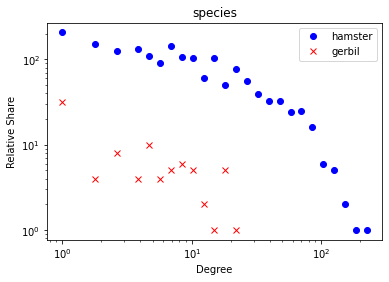

{'majority': 0.25268979186772234, 'minority': 9.07488558303322}


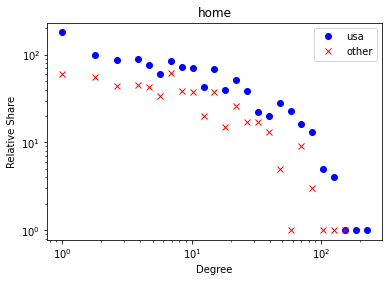

{'majority': 0.6124078788691082, 'minority': 1.366705359952326}


In [9]:
# your code should create the same dictionaries, where ... is replaced by the respective float values
from matplotlib import pyplot as plt

def get_share_of_hamsters(G, attr):
    shares = {}
    nodes = nx.get_node_attributes(G, attr)
    attribute_values = list(nodes.values())
    categories = set(attribute_values)
    for category in categories:
        shares[category] = attribute_values.count(category)/len(nodes)
    minority_attr = min(shares, key=shares.get)
    majority_attr = max(shares, key=shares.get)
    
    return shares, majority_attr, minority_attr;

def get_perception_bias(G, attr, majority, minority, fileName):
    group_dict = {}
    minority_nodes = []
    majority_nodes = []
    
    # Add group attribute which specifies whether a node belongs to the majority or minority group.
    nodes = nx.get_node_attributes(G, attr)
    for key, value in nodes.items():
        if value == majority:
            group_dict[key]= 1
            majority_nodes.append(key)
        else: 
            group_dict[key]= 0
            minority_nodes.append(key)
    
    graph = G.copy()
    nx.set_node_attributes(graph, group_dict, 'group')
    pb = perception_bias(graph, 'group')
    
    # Calculate minority and majority bias
    pb_minority = []
    pb_majority = []
    
    for key, value in pb.items():
        if nodes[key] == minority:
            pb_minority.append(value)
        else:
            pb_majority.append(value)
            
    # Calculate average bias
    pb_minority_avg = sum(pb_minority)/len(pb_minority)
    pb_majority_avg = sum(pb_majority)/len(pb_majority)
    
    result={}
    result['majority'] = pb_majority_avg
    result['minority'] = pb_minority_avg
    
    displayPlot(G, attr, majority_nodes, minority_nodes, majority, minority, fileName)
    return result

        
def displayPlot(G, attr, majorities_list, minorities_list, majority, minority, fileName):
    
    degrees_majority = list(dict(nx.degree(G, majorities_list)).values())
    degrees_minority = list(dict(nx.degree(G, minorities_list)).values())
    total_degrees = degrees_majority + degrees_minority

    bin_edges = np.logspace(np.log10(min(total_degrees)), np.log10(max(total_degrees)), num=30)
    density_majority, _ = np.histogram(degrees_majority, bins=bin_edges)
    density_minority, _ = np.histogram(degrees_minority, bins=bin_edges)
    
    plt.loglog(bin_edges[:-1], density_majority, marker='o', linestyle='none', color='b', label=majority)
    plt.loglog(bin_edges[:-1], density_minority, marker='x', linestyle='none', color='r', label=minority)
    plt.xlabel("Degree")
    plt.ylabel("Relative Share")
    plt.title(attr)
    plt.legend()
    plt.savefig(fileName)
    plt.show()
    
# getting shares, minority and majority of hamsters for each attribute
dist_gender, majority_gender, minority_gender = get_share_of_hamsters(G, 'gender')
dist_species, majority_species, minority_species = get_share_of_hamsters(G, 'species')
dist_home, majority_home, minority_home = get_share_of_hamsters(G, 'home')

print(dist_gender)
print(dist_species)
print(dist_home)

# getting perception bias for each attribute
pb_gender = get_perception_bias(G, 'gender', majority_gender, minority_gender,'dd_gender.png')
print(pb_gender)

pb_species = get_perception_bias(G, 'species', majority_species, minority_species,'dd_species.png')
print(pb_species)

pb_home = get_perception_bias(G, 'home', majority_home, minority_home,'dd_home.png')
print(pb_home)

**A1e):** As we already mentioned the network is homopholic regarding the three attributes, and according to the lecture we would expect for the minority to receive less degree than what it is expected from its size and the majority to capture more. This is what can be observed from the degree distribution plots, the minorities are at disadvantage.


### Task 2:  Detecting Communities in Stochastic Block Models (17 pts)

In this task you should use functions from `networkx` wherever possible.

#### a) Creating  Graphs According to Stochastic Block Models (4 pts)

In this task we want to generate two networks ``G1`` and ``G2`` according to the following specifications of stochastic block models:
* Both networks should contain 400 nodes, divided into four communities of 100 nodes each. 
* Within each community, the probability of an edge existing should be .05 for ``G1``, and 0.02 for ``G2``.
* Between adjacent communities (1 and 2, 2 and 3, 3 and 4, **AND 1 and 4**) the probability of an edge existing should be 0.001 for ``G1``, and 0.005 for ``G2``.
* There should be no other edges.
* To obtain reproducible results, you have to **pass a random seed** to the stochastic block model generator function from `networkx`. Pass `seed = 2021`, as initialised in the cell below!
* Each node should have an attribute ``'community'`` which indicates the community (`int(1)` - `int(4)`) that it belongs to.
* In the end, you should remove all nodes which are not in the biggest connected component of the resulting graphs.

Create two 4x4 matrices ``probs_G1`` and ``probs_G2`` (use list of lists as provided below), where ``probs_G1[i][j] == probs_G1[j][i]`` should be the probability that an edge exists between individual nodes from community `i` and individual nodes from community `j` in ``G1`` (same for ``probs_G2`` and ``G2``). 
Afterwards, apply the stochastic block model generator from `networkx` to create ``G1`` and ``G2`` from these matrices, following all the specifications listed above. Again, make sure to use the specified seed, and to filter for the biggest connected component as described above.

Plot the resulting graphs using a spring layout and color the nodes according to the community they belong to, i.e. two nodes should have the same color if and only if they belong to the same community. Save the plots as **'G1.png'** and **'G2.png'**. Do not remove the lines of your code which create and save your .png file.

_Hint: When initialising ``probs_G1`` and ``probs_G2``, don't forget to also include the probability of an edge existing **within** a community._

In [22]:
seed = 2021

probs_G1 = [[..., ..., ..., ...],
            [..., ..., ..., ...],
            [..., ..., ..., ...],
            [..., ..., ..., ...]]
G1 = ...

probs_G2 = [[..., ..., ..., ...],
            [..., ..., ..., ...],
            [..., ..., ..., ...],
            [..., ..., ..., ...]]
G2 = ...

#### b) Community Detection (5 pts)

Apply greedy modularity community detection and the Girvan-Newman algorithm to predict communities on both graphs ``G1`` and ``G2`` - for Girvan-Newman, use the partition into **four communities** . Plot the graphs with node colors according to their predicted communities, using the same orientation as in a). Save the graphs as **'greedymodularity_G1.png'**, **'greedymodularity_G2.png'**, **'girvannewman_G1.png'** and **'girvannewman_G2.png'**. Do not remove the lines of your code which create and save your .png file.

Like in 1d), calculate the modularities of the resulting partitions. For greedy modularity community detection, store the values into variables ``m_gm_G1`` and ``m_gm_G2``, and for Girvan-Newman, store the values into ``m_gn_G1`` and ``m_gn_G2``.

In [25]:
m_gm_G1 = ...
m_gm_G2 = ...
m_gn_G1 = ...
m_gn_G2 = ...

#### c) Rand Index (5 pts)

Implement a function that returns the _Rand index_ of a given partition, using the function signature specified in the cell below!


In [3]:
def rand_index(H: nx.Graph, gt_attr: str, pred_part: List) -> float:
    """
    :param H: input networkx graph in which ground truth communities are encoded
    :param gt_attr: string specifying the name of the node attribute that indicates which ground truth community each 
    :               node belongs
    :param pred_part: list of lists (or sets) of node IDs, where the sublists/sets correspond to predicted communities, 
    :                 and thus form a partition of all nodes in a graph 
    :return: the resulting Rand index as a float value
    """
    # your code here
    raise NotImplementedError

#### d) Evaluating Partitions (3 pts)

Apply your implementation from c) to compute the Rand index of the partitions from both graphs and algorithms computed in b). For greedy modularity community detection store the values into variables ``ri_gm_G1`` and ``ri_gm_G2``, for Girvan-Newman store the values into variables ``ri_gn_G1`` and ``ri_gn_G2``.

Does one of the two community detection algorithms work significantly better? Explain your answer!

In [26]:
ri_gm_G1 = ...
ri_gm_G2 = ...
ri_gn_G1 = ...
ri_gn_G2 = ...

**A2d):** _Please provide your answer regarding your observations here!_

### Task 3:  Label Propagation (20 pts)

In this task, we will implement the Label Propgation algorithm which has been presented in lecture, and apply it on the graphs that we created in the previous task.

#### a) The Label Propagation Algorithm (10 pts)

Implement the label propagation algorithm, using the signature specified in the cell below.
Recall that the algorithm works in the following steps:

1. Unless a predefined initial labeling is specified, give a unique label to each node in the network 
2. Arrange the nodes in the network in a random order 
3. For each node in the network (in this random order), set its label to a label occurring with the highest frequency among its neighbours - ties may be settled arbitrarily. 
4. go to 2 as long as there exists a node with a label that does not have the highest frequency among its neighbours.

In your implementation, you also must provide an option to specify a custom set of initial labels via a corresponding dictionary which maps node IDs to their labels. In particular, this should also allow to initialize nodes **without a label**, by **not** including specific node IDs as keys in the dictionary. Note that in step 3, if for a specific node none of its neighbors currently have a label, this specific node's label should stay as is.
In such a setting, you may assume that the input graph is connected, so that eventually, the predefined input labels will propagate through the full network. Note that since the nodes are updated sequentually rather than synchronously, there cannot be any oscillation of labels, so that the algorithm will converge. 

You have to return a list of lists of node IDs, in which each of the inner lists corresponds to one of the found communities. Thus, two nodes should end up in the same inner list if and only if they belong to the same community. 

**Note:** There are ways to implement the algorithm in a deterministic or in a non-determinnistic manner. We allow both kinds of solutions.

In [4]:
def label_propagation(G: nx.Graph, init_labels: Dict=None) -> List[List]:
    """
    :param G: input networkx graph
    :param init_labels: dictionary of initial labels, where node IDs serve as keys, and their initial labels as values. 
                        If not specified/None, all nodes have to be assigned a unique label at the beginning of the algorithm.
    :return: List of lists of node IDs, where each sublist corresponds to one of the found communities.
    """
    # your code here
    raise NotImplementedError

#### b) Label Propagation on Stochastic Block Models (3 pts)

Apply your implementation from a) **ten times each** on both graphs `G1`and `G2` from task 2. For each of the corresponding partitions, compute both the resulting modularities as well as the Rand index values. Store the ten resulting modularities and Rand index values for graph `G1` into lists ``ri_lp_list_G1`` and ``m_lp_list_G1``, and the ten resulting modularities and Rand indices for `G2` into lists ``ri_lp_list_G2`` and ``m_lp_list_G2``, respectively. Further, for both graphs, compute the average modularity and Rand index that you have obtained from the ten respective runs, and store the results into the variables `avg_m_lp_G1` and `avg_ri_lp_G1` for `G1`, and into the variables `avg_m_lp_G1` and `avg_ri_lp_G2` for `G2`.

**Note:** Do not worry if you have a deterministic implementation which always returns the same partitions. We run the label propagation algorithms multiple times to account for variations in the outcomes of non-deterministic implementations. Further, there are also methods to aggregate different partitions, which however are not in scope of this lecture.

In [ ]:
m_lp_list_G1 = ...
m_lp_list_G2 = ...
avg_m_lp_G1 = ...
avg_m_lp_G2 = ...
ri_lp_list_G1 = ...
ri_lp_list_G2 = ...
avg_ri_lp_G1 = ...
avg_ri_lp_G2 = ...

#### c) Label Propagation with Pre-informed Initial Labels (4 pts)

For both graphs `G1`and `G2`, determine in each community the node with the highest degree. Store these highest-degree nodes per community for `G1` in a dictionary `init_G1`, and for `G2` in a dictionary `init_G2`. In these dictionaries, the four node IDs should serve as keys, and the corresponding community indices should serve as values.

Rerun the experiments from b), but this time pass the respective dictionaries `init_G1` and `init_G2` as corresponding values to the `init_labels` parameter of your implementation from a) when looking for communities in `G1`and `G2`.

Again, run your label propagation algorithm **ten times** on each of the both graphs `G1`and `G2`, and compute the corresponding resulting modularities and Rand indices. Store the ten resulting modularities and Rand indices for graph `G1` into lists ``ri_lpi_list_G1`` and ``m_lpi_list_G1``, and the ten resulting modularities and Rand indices for `G2` into lists ``ri_lpi_list_G2`` and ``m_lpi_list_G2``, respectively. Once more, for both graphs, compute the average modularity and Rand index that you have obtained from the ten respective runs, and store the results into the variables `avg_m_lpi_G1` and `avg_ri_lpi_G1` for `G1`, and into the variables `avg_m_lpi_G2` and `avg_ri_lpi_G2` for `G2`.

In [ ]:
init_G1 = ...
init_G2 = ...

In [ ]:
m_lpi_list_G1 = ...
m_lpi_list_G2 = ...
avg_m_lpi_G1 = ...
avg_m_lpi_G2 = ...
ri_lpi_list_G1 = ...
ri_lpi_list_G2 = ...
avg_ri_lpi_G1 = ...
avg_ri_lpi_G2 = ...

#### d) Evaluating the Results (3 pts)

Give a summary of the results that you have obtained in tasks b) and c), also in light of the results from task 2. How does label propagation fare compared to Girvan-Newman and greedy modularity maximation? Under which circumstances can pre-informed labels be used effectively? Provide a thorough discussion to these questions! 

**A3d):** _Please provide your discussion here!_

### Task 4:  Generating (Dis)Assortative Networks (25 pts)

#### a) The Xalvi-Brunet and Sokolov Algorithm (10 pts)

Implement the Xalvi-Brunet and Sokolov algorithm for generating (Dis)Assortative Networks, using the signature specified in the cell below.  
Recall that the algorithm takes as input a graph, on which edge pairs are going to be rewired for a fixed number of steps. Each of the rewiring steps should use the following procedure:
* two random edges are drawn, and their incident nodes are labeled a, b ,c , and d so that $k_a \geq k_b \geq k_c \geq k_d$.
* with a given probability $p$, the edges are rewired to make the network more (dis)assortative, following the procedure in the next step. Otherwise, the edges are rewired at random.
* When aiming for an assortative network, we rewire the edges such that $a$ joins $b$ and $c$ joins $d$. Otherwise, we join $a$ with $d$ and $b$ with $c$.
* To avoid self-loops and multiedges, we redraw the edges and repeat the current step if the two drawn edges share a node, or if the rewiring would yield an edge that already exists in the network (but has not been drawn for rewiring). Note that in the implementation we impose a limit on how often we try to resample if such a case occurs.

**Important: Do not modify the input graph directly (i.e. create a copy before modifying the graph).**

In [ ]:
import random

def xbs(G: nx.Graph, p: float, assortative: bool=True, n_steps: int=100, n_tries: int=100) -> nx.Graph:
    """
    :param G: input graph to rewire
    :param p: probability of rewiring for (dis)assortativity 
    :param assortative: bool indicating whether we want to rewire for an assortative or disassortative network. 
    :                   If True, rewire for an assortative network. (default is True)
    :param n_steps: number of rewiring steps (default is 100)
    :param n_tries: number of times we resample an edge pair if a sampled pair shares a node or its rewiring yields an
    :               existing edge -> if we exceed this number at some point, we finish the rewiring early and raise a warning
    :               (default is 100 which you may use throughout this whole task)
    :
    :return: resulting networkx graph
    """
    # your code here
    raise NotImplementedError

#### b) Rewiring the Hamsterster Network (7 pts)

Apply your implementation from a) to create ten rewirings of the Hamsterster network. More precisely, create one assortative and one disassortative rewiring for each of the parameter values $p\in \{0.2,0.4,0.6,0.8,1\}$, with $n_{steps}=10000$ rewiring steps. Store the ten graphs into ``graphs`` using the format which is given below. Make sure that you do **not** modify ``G`` from task 1a). For each of the resulting graphs, compute the assortativity coefficient $r$ and store it into ``r_coef`` using the format which is given below. 

Compute all degree correlations $k_{nn}(k)$. Create two degree correlation plots, one for the assortative, and one for the disassortative rewirings, in which the correlations for all five values of $p$ are displayed in distinct colors. Save them as **'assortative_rw.png'** and **'disassortative_rw.png'**. Do not remove the lines of your code which create and save your .png file.

In [37]:
# your code should create the same dictionary, where ... is replaced by the respective networkx graph
graphs = {
    'assortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    },
    'disassortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    }
}

# your code should create the same dictionary, where ... is replaced by the respective float
r_coef = {
    'assortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    },
    'disassortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    }
}

#### c) Impact of Assortativity on Path Lengths (3 pts)

For each of the graphs created in b), compute the average path length and diameter of the network and store the values into ``avg_pls`` and ``diameters`` using the format below. Compare these values against each other as well as against the values of the original graph. What do you observe?  
__Note:__ Depending on the computation power of your machine, this computation may take a little while.

In [38]:
# your code should create the same dictionaries, where ... is replaced by the respective float
avg_pls = {
    'assortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    },
    'disassortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    }
}

diameters = {
    'assortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    },
    'disassortative': {
        '0.2': ...,
        '0.4': ...,
        '0.6': ...,
        '0.8': ...,
        '1.0': ...
    }
}

**A4c):** _Please provide your answer regarding your observations here!_

#### d) Impact of Assortativity on Robustness (5 pts)

Conduct a targeted attack (using the function in the cell below) on the original network as well as the assortative and disassortative rewirings from b) with $p=1$, where in each attack you successively delete 500 nodes (always one at a time), each time the node with the highest degree. Save the graphs that result from your attacks in ``G_attacked``, ``assortative_attacked`` and  ``disassortative_attacked``. Make sure that you do **not** modify ``G`` (task 1a), ``graphs['assortative']['1.0']`` and ``graphs['disassortative']['1.0']`` (both task 3b).

For each attacked graph, plot the number of removed nodes against the share of the biggest connected component in the graph. Include the curves of all three graphs in the same plot and store it as **'robustness.png'**. What do you observe?

In [49]:
def degree_attack(G: nx.Graph, n: int) -> nx.Graph:
    """
    :param G: networkx graph whose nodes we want to attack
    :param n: number of nodes which should be attacked/deleted
    :         (always one at the same time - recalculate degrees before deleting next node)
    :
    :return: resulting networkx graph after deleting n nodes
    """
    Gc = G.copy()
    for _ in range(n):
        i = sorted(Gc.degree, key=lambda x: x[1], reverse=True)[0][0]
        Gc.remove_node(i)
    return Gc

In [46]:
G_attacked = ...
assortative_attacked = ...
disassortative_attacked = ...

**A4d):** _Please provide your answer regarding your observations here!_